In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [2]:
data = pd.read_csv('Catalogues/NGC1027_2.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,40.703561,59.616849,464326960168035712,0.4634,0.0435,0.475,-0.355,-0.316,31,1.407,...,0.983,16.348143,17.074308,15.513087,1.561221,NaN,41.320749,40.703564,59.616850,0.493176
1,40.678860,59.617239,464327024587489024,0.9369,0.0880,7.230,-3.622,-6.257,31,1.339,...,1.109,17.468147,18.477590,16.470379,2.007212,NaN,41.326123,40.678892,59.617266,0.971419
2,40.685537,59.618550,464327024587489920,0.0601,0.2174,1.236,-0.795,-0.947,95,NaN,...,1.006,19.176962,20.377491,18.078670,2.298821,NaN,41.325967,40.685544,59.618554,0.086407
3,40.678628,59.622599,464327024587500416,0.1310,0.4404,0.565,-0.086,0.559,95,NaN,...,1.016,20.087357,21.160364,19.089025,2.071339,NaN,41.331080,40.678629,59.622597,NaN
4,40.689213,59.627526,464327024587511680,0.4066,0.1043,1.443,-1.431,0.182,31,1.369,...,1.014,17.888865,18.752983,16.999363,1.753620,NaN,41.333441,40.689225,59.627525,0.434609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662690,39.868827,63.573103,515666697123964288,0.3674,0.0774,1.141,0.327,-1.094,31,1.441,...,1.012,17.385921,18.006200,16.629845,1.376356,NaN,45.082494,39.868824,63.573108,0.396864
662691,39.864186,63.569378,515666697123966336,0.2353,0.0468,2.435,-2.414,0.319,31,1.445,...,1.057,16.445110,17.040998,15.683360,1.357638,NaN,45.080028,39.864210,63.569376,0.263704
662692,39.870980,63.581248,515666727179961856,0.4480,0.0830,1.072,0.449,-0.973,31,1.432,...,1.011,17.553800,18.198118,16.772041,1.426077,NaN,45.089424,39.870975,63.581252,0.477285
662693,39.787588,63.571363,515666830258703104,1.3174,0.5515,0.631,0.626,0.074,95,NaN,...,1.004,20.314638,21.198803,19.411152,1.787651,NaN,45.096570,39.787581,63.571362,1.355434


In [3]:
#https://simbad.cds.unistra.fr/simbad/sim-ref?bibcode=2020A%26A...633A..99C
pmra_sbd = -1.753
pmde_sbd = 2.090
L_size = 2

data_mov = movprop_filter(data,pmra_sbd,pmde_sbd,L_size,"vizier")
len(data_mov)

205988

Text(0.5, 0, 'RA (deg)')

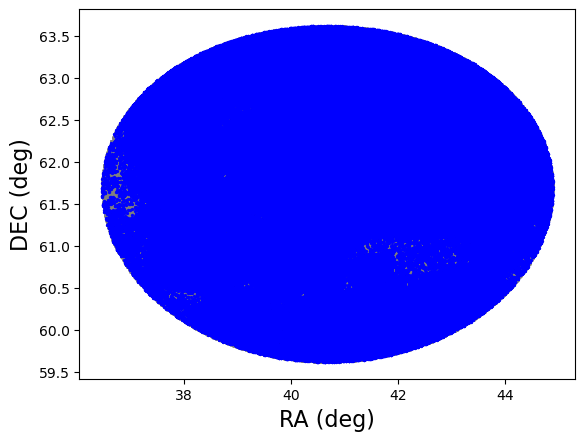

In [4]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

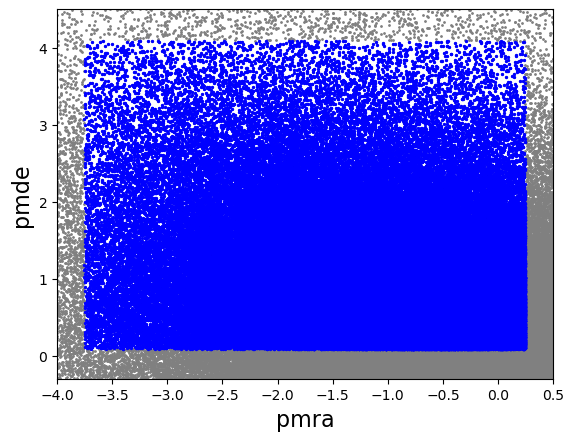

In [18]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.set_xlim(-4.,0.5)
ax.set_ylim(-0.3,4.5)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

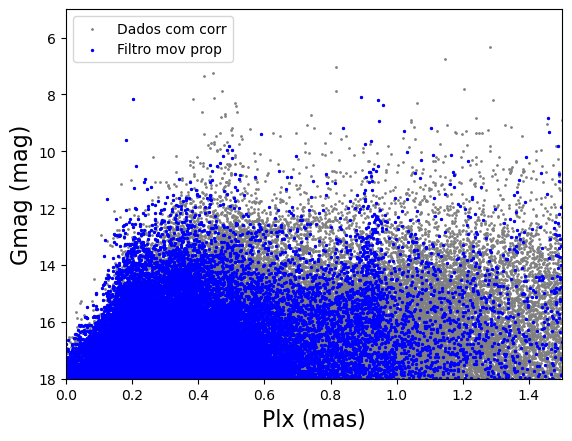

In [19]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

### Cut in Parallax

In [20]:
ll, = np.where((data_mov["Plx_corr"] < 1.1)&(data_mov["Plx_corr"] > 0.75))

In [21]:
data_plx = data_mov.iloc[ll]

Text(0.5, 0, 'RA (deg)')

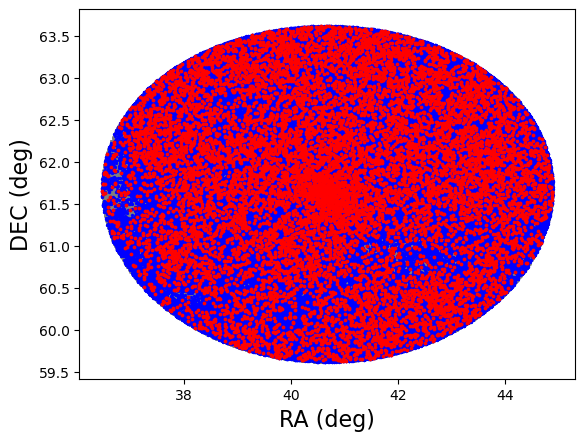

In [22]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.scatter(data_plx.RAJ2000, data_plx.DEJ2000,color = 'r', s=3)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

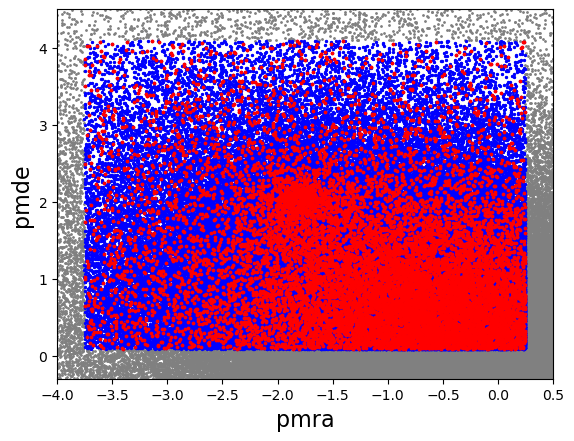

In [23]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.scatter(data_plx.pmRA, data_plx.pmDE,color = 'r', s=3)
ax.set_xlim(-4.,0.5)
ax.set_ylim(-0.3,4.5)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


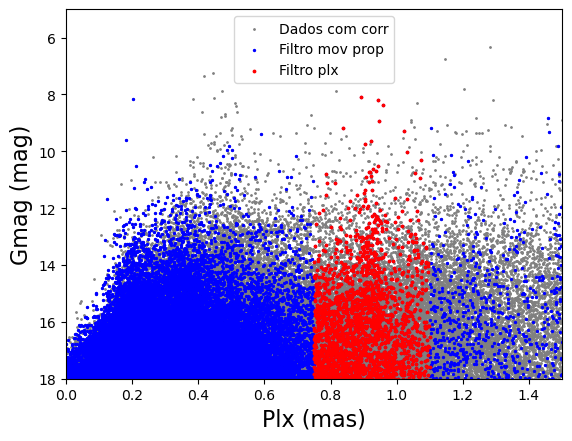

In [24]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.scatter(data_plx.Plx_corr,data_plx.Gmag,color = 'r', s=3, label='Filtro plx')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

In [25]:
#data_plx.to_csv('Catalogues/NGC1027_3.csv', index=False) 